In [255]:
import numpy as np
import math
from RNG_Uniform import *
from RNG_UsualLaw_Continue import *

## Metropolis Hastings on $\mathbb{R}$ with $\mathcal{N}(\mu,\sigma^2)$

In [260]:
def MH(pi,size =10000,sigma = 1,start_point=1):
    """
    Metropolis Hasting algorithm
    pi is the target law
    size is the length of the output series
    sigma is the standart deviation of the gaussian law use to generate candidate
    start_point is the 1st value of the series
    """
    x0 = start_point
    res =[x0]
    xt = x0
    acceptance = 0
    for i in range(size):
        y = xt + Gaussian(0,sigma**2,1)
        alpha = pi(y) / pi(xt)
        U = MT.uniform()
        if (U<alpha):
            res.append(y)
            xt =y 
            acceptance +=1
        else:
            res.append(xt)
    print("Acceptance Ratio :",acceptance/size)
    return res
        

Some Examples for usual law

In [269]:
def gaussian_density(x):
    mu, sigma = 5,1 # mean and standard deviation
    num = np.exp( - ( x - mu )**2 / ( 2.0 * sigma **2 ) )
    den = np.sqrt( 2 * np.pi * sigma **2)
    return  num / den

In [270]:
sample = MH(gaussian_density)

Acceptance Ratio : 0.7081


(array([0.00323248, 0.00452547, 0.00129299, 0.0006465 , 0.        ,
        0.00129299, 0.00840445, 0.01163693, 0.01422292, 0.02327387,
        0.02198088, 0.04008277, 0.04396175, 0.07628657, 0.07887256,
        0.10020694, 0.13382475, 0.17455402, 0.21592979, 0.25019409,
        0.2838119 , 0.34393607, 0.36591694, 0.3917768 , 0.37561439,
        0.36397745, 0.40729271, 0.38531183, 0.37432139, 0.31031825,
        0.30967176, 0.28316541, 0.24760811, 0.19006993, 0.12865278,
        0.11119737, 0.08016555, 0.09180248, 0.06464964, 0.0349108 ,
        0.02909234, 0.0181019 , 0.02909234, 0.01292993, 0.00905095,
        0.00452547, 0.00711146, 0.00452547, 0.0006465 , 0.00193949]),
 array([1.        , 1.15466444, 1.30932889, 1.46399333, 1.61865778,
        1.77332222, 1.92798667, 2.08265111, 2.23731556, 2.39198   ,
        2.54664445, 2.70130889, 2.85597334, 3.01063778, 3.16530223,
        3.31996667, 3.47463112, 3.62929556, 3.78396   , 3.93862445,
        4.09328889, 4.24795334, 4.40261778, 4.

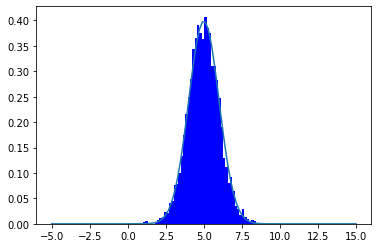

In [271]:
x_array = np.linspace(-5.0, 15.0, 100)
y_array = np.asarray( [gaussian_density(x) for x in x_array] )

plt.plot(x_array,y_array)
plt.hist(sample, bins=50,density=True,color='b')

In [272]:
def exponential_density(x):
    lambdaa = 2
    if x<0:
        return 0
    else:
        return lambdaa*np.exp(-lambdaa*x)

In [273]:
sample = MH(exponential_density,pow(10,4))

Acceptance Ratio : 0.3338


(array([1.80834285e+00, 1.49907083e+00, 1.16426258e+00, 9.82671666e-01,
        7.75544530e-01, 6.71508068e-01, 4.73838792e-01, 3.96284339e-01,
        3.70748117e-01, 2.81844232e-01, 2.09018709e-01, 1.55108906e-01,
        1.04982247e-01, 1.22006396e-01, 1.06873819e-01, 5.58013747e-02,
        5.10724446e-02, 5.10724446e-02, 2.36446503e-02, 1.60783622e-02,
        2.93193664e-02, 1.60783622e-02, 1.13494321e-02, 1.60783622e-02,
        1.13494321e-02, 1.13494321e-02, 1.32410042e-02, 3.78314405e-03,
        4.72893006e-03, 6.62050208e-03, 1.89157202e-03, 9.45786012e-04,
        1.89157202e-03, 9.45786012e-04, 0.00000000e+00, 9.45786012e-04,
        0.00000000e+00, 1.89157202e-03, 1.89157202e-03, 9.45786012e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.45786012e-04, 0.00000000e+00,
        9.45786012e-04, 1.89157202e-03]),
 array([3.40546080e-04, 1.06062136e-01, 2.11783726e-01, 3.17505316e-01,
        4.23226906e-01

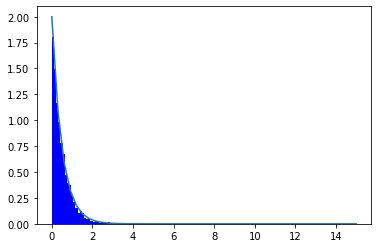

In [274]:
x_array = np.linspace(0, 15.0, 50)
y_array = np.asarray( [exponential_density(x) for x in x_array] )

plt.plot(x_array,y_array)
plt.hist(sample, bins=50,density=True,color ='b')

In [275]:
def gamma_density(x):
    k,theta = 1 , 4
    if x<0:
        return 0
    else:
        return ((pow(x,k-1)*np.exp(-x/theta))/(pow(theta,k)*math.gamma(k)))

In [276]:
sample = MH(gamma_density,pow(10,4),sigma=20)

Acceptance Ratio : 0.1562


(array([2.59589563e-01, 2.35920193e-01, 1.77288224e-01, 1.58878714e-01,
        1.11230570e-01, 8.30748484e-02, 8.52406731e-02, 8.05996201e-02,
        5.36815128e-02, 5.01233722e-02, 2.98574408e-02, 3.52720027e-02,
        2.84651249e-02, 1.98018261e-02, 1.99565278e-02, 1.79454049e-02,
        1.37684572e-02, 1.76360013e-02, 1.22214395e-02, 5.87866711e-03,
        3.86754415e-03, 7.27098300e-03, 8.04449183e-03, 4.64105298e-03,
        3.24873709e-03, 5.41456181e-03, 2.93933355e-03, 1.23761413e-03,
        1.70171943e-03, 2.32052649e-03, 3.09403532e-04, 1.70171943e-03,
        1.85642119e-03, 3.09403532e-04, 1.70171943e-03, 9.28210596e-04,
        4.64105298e-04, 3.09403532e-04, 3.09403532e-04, 6.18807064e-04,
        9.28210596e-04, 0.00000000e+00, 1.54701766e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.09403532e-04,
        0.00000000e+00, 1.54701766e-04]),
 array([7.69214965e-03, 6.54032547e-01, 1.30037295e+00, 1.94671334e+00,
        2.59305374e+00

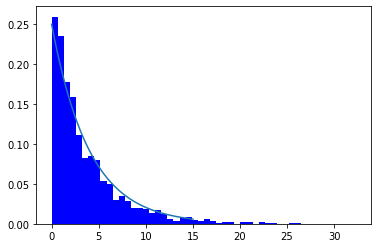

In [277]:
x_array = np.linspace(0, 15.0, 50)
y_array = np.asarray( [gamma_density(x) for x in x_array] )

plt.plot(x_array,y_array)
plt.hist(sample, bins=50,density=True,color='b')

In [278]:
def autocorrelation(x, lags = 50):
    res=[]
    n = len(sample)
    mu = Expectation(sample)
    sigma2 = Variance(sample)
    for k in range(lags):
        R = 0.0
        for i in range(n-k):
            R+= (sample[i] - mu)*(sample[i+k]-mu)
        res.append(abs(R/((n-k)*sigma2)))
    plt.figure()
    plt.bar([i for i in range(lags)],res)
    plt.ylim(0,1)
    plt.title("Autocorrelation")
    plt.xlabel('Lags')
    plt.show()
    return res

As we increase the variance for the Metropolis Hasting, the autocorrelation of the time series decreases.
But as the variance increase the acceptance ratio decrease aswell.

We need to find the good trade-off between low autocorrelation and good acceptance ratio.

In the literature a good acceptance ratio is 0.25. It correspond here to $\sigma=5$.

Note that the law for generate a candidate has an impact aswell.

Sigma : 0.1
Acceptance Ratio : 0.9634


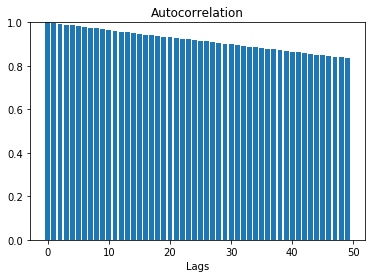

Sigma : 0.5
Acceptance Ratio : 0.8535


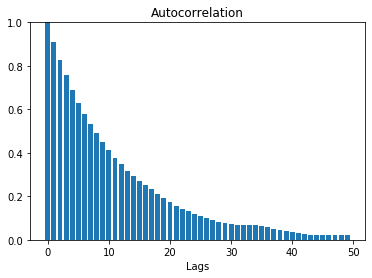

Sigma : 1
Acceptance Ratio : 0.7044


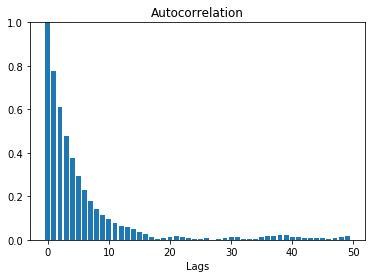

Sigma : 5
Acceptance Ratio : 0.2319


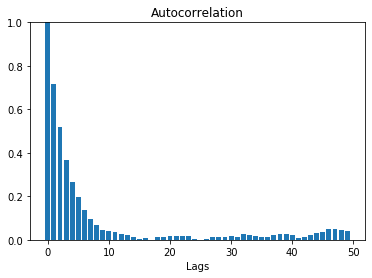

Sigma : 10
Acceptance Ratio : 0.12


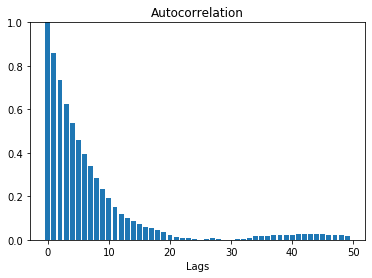

In [279]:
for sigmaa in [0.1,0.5,1,5,10]:
    print("Sigma :",sigmaa)
    sample = MH(gaussian_density,pow(10,4),sigma=sigmaa)
    _ = autocorrelation(sample)